In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns
import scipy.stats as st 

# one run

In [2]:
path = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_18_17_10_29_0000--s-0/progress.csv'

In [3]:
file = pandas.read_csv(path)

In [4]:
returns = file['evaluation/Returns Mean']
ma_returns = file['evaluation/Returns Mean'].rolling(window=10).mean()
steps = (file['Epoch'] + 11) * 1000

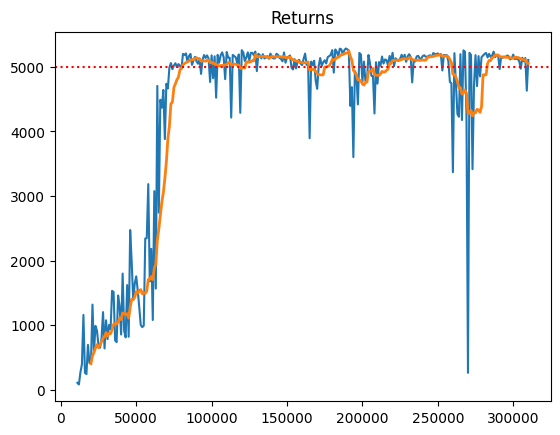

In [5]:
plt.plot(steps, returns)
plt.plot(steps, ma_returns, linewidth=2)
plt.axhline(5000, color='r', ls=':')
plt.title("Returns")
# plt.savefig('temp')
plt.show()

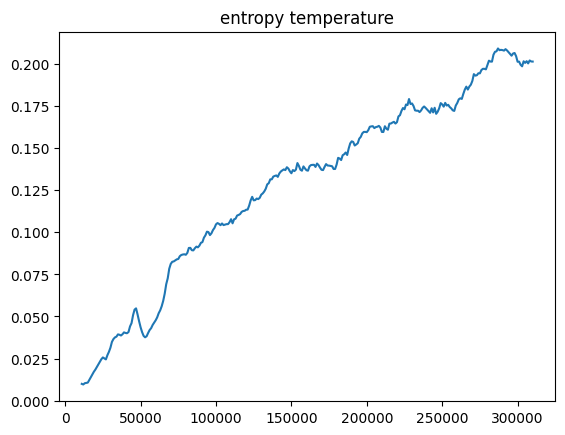

In [6]:
alpha = file['trainer/Alpha']
# alpha_loss = file['trainer/Alpha Loss']
plt.plot(steps, alpha)
# plt.plot(steps, alpha_loss)
plt.title('entropy temperature')
plt.show()

In [7]:
bias = file['evaluation/Estimation Bias Mean']
q_pred = file['evaluation/EB/Q_Pred Mean']
q_true = file['evaluation/EB/Q_True Mean']

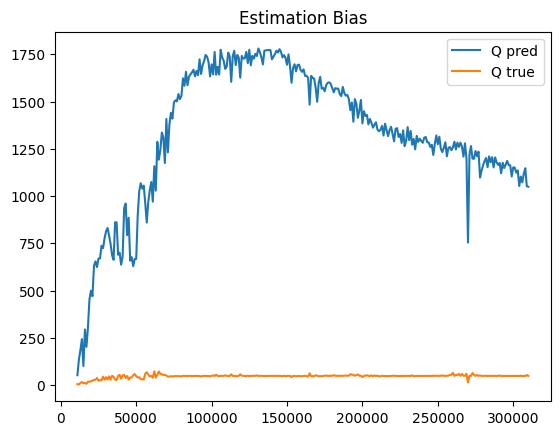

In [8]:
# plt.plot(steps, bias, label='Estimation Bias')
plt.plot(steps, q_pred, label='Q pred')
plt.plot(steps, q_true, label='Q true')
plt.legend()
plt.title("Estimation Bias")
# plt.savefig('temp1')
plt.show()

In [9]:
min_ret = file['evaluation/Returns Min']
max_ret = file['evaluation/Returns Max']
std_ret = file['evaluation/Returns Std']

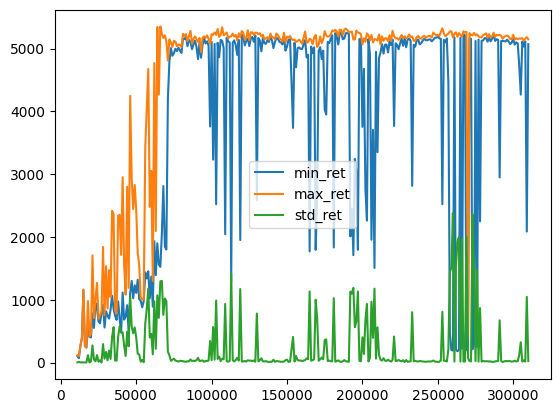

In [10]:
plt.plot(steps, min_ret, label='min_ret')
plt.plot(steps, max_ret, label='max_ret')
plt.plot(steps, std_ret, label='std_ret')
plt.legend()
# plt.savefig('temp', pad_inches=0)
plt.show()

In [11]:
mean = file['trainer/Z Expert Predictions Mean']
std = file['trainer/Z Expert Predictions Std']
min = file['trainer/Z Expert Predictions Min']
max = file['trainer/Z Expert Predictions Max']

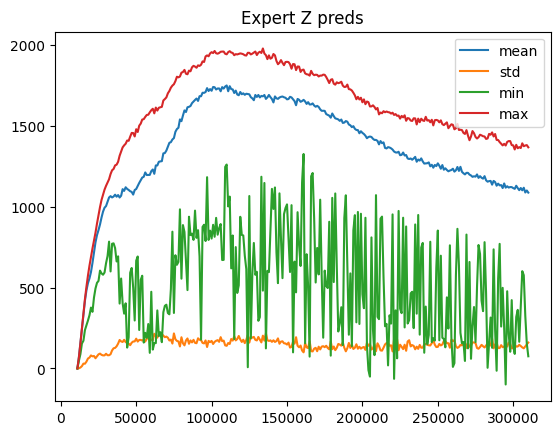

In [12]:
plt.plot(steps, mean, label='mean')
plt.plot(steps, std, label='std')
plt.plot(steps, min, label='min')
plt.plot(steps, max, label='max')
plt.legend()
plt.title('Expert Z preds')
# plt.savefig('temp', pad_inches=0)
plt.show()

In [13]:
mean = file['trainer/Z Policy Predictions Mean']
std = file['trainer/Z Policy Predictions Std']
min = file['trainer/Z Policy Predictions Min']
max = file['trainer/Z Policy Predictions Max']

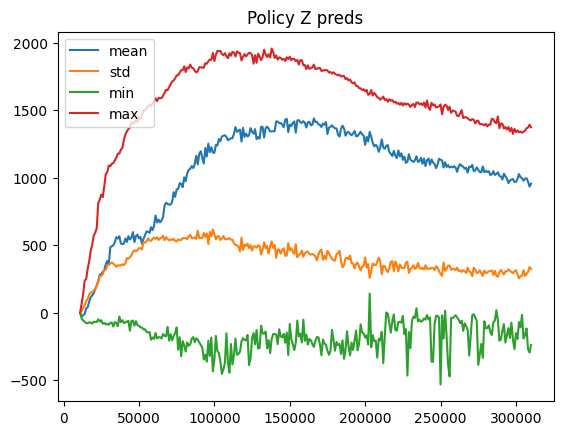

In [14]:
plt.plot(steps, mean, label='mean')
plt.plot(steps, std, label='std')
plt.plot(steps, min, label='min')
plt.plot(steps, max, label='max')
plt.legend()
plt.title('Policy Z preds')
# plt.savefig('temp', pad_inches=0)
plt.show()

In [15]:
loss1 = file['trainer/ZF1 Loss']
loss2 = file['trainer/ZF2 Loss']

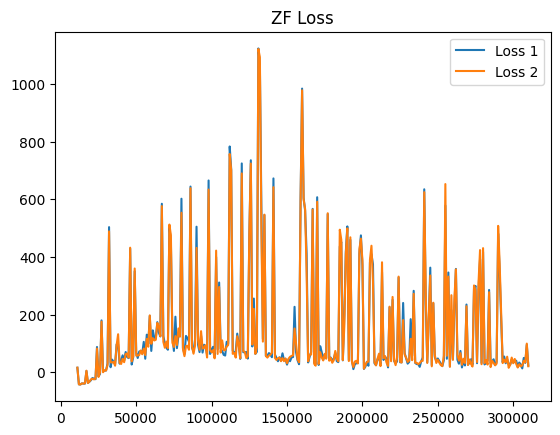

In [16]:
plt.plot(steps, loss1, label='Loss 1')
plt.plot(steps, loss2, label='Loss 2')
plt.legend()
plt.title('ZF Loss')
plt.show()

In [17]:
expert_reward = file['trainer/Z Expert Predictions Mean'] - file['trainer/Z Expert Targets Mean']
policy_reward = file['trainer/Z Policy Predictions Mean'] - file['trainer/Z Policy Targets Mean']

In [18]:
policy_reward.values[-100:].mean()

4.5475882

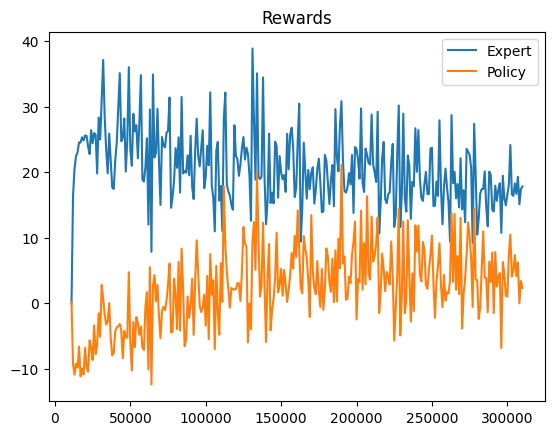

In [19]:
plt.plot(steps, expert_reward, label='Expert')
plt.plot(steps, policy_reward, label='Policy')
plt.legend()
plt.title('Rewards')
plt.show()

In [20]:
policy_loss = file['trainer/Policy Loss']

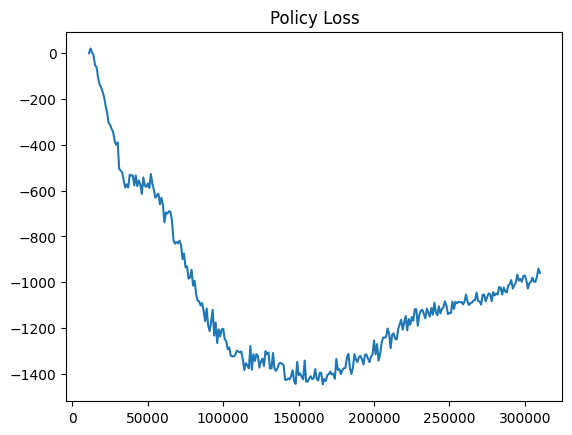

In [21]:
plt.plot(steps, policy_loss)
plt.title('Policy Loss')
plt.show()

In [22]:
path_l_mean = file['evaluation/path length Mean']
path_l_std = file['evaluation/path length Std']
path_l_min = file['evaluation/path length Min']
path_l_max = file['evaluation/path length Max']

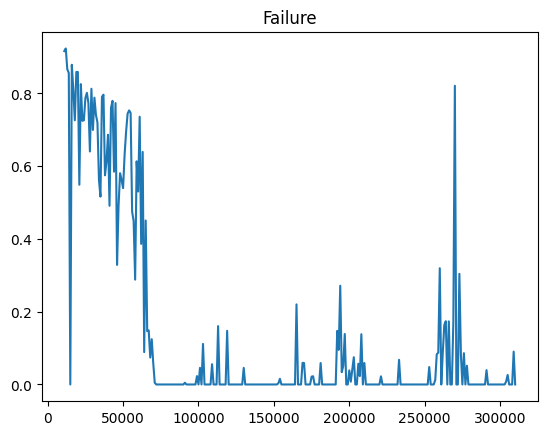

In [23]:
failure = (1000. - path_l_mean) / 1000.
plt.plot(steps, failure)
plt.title('Failure')
plt.show()

In [24]:
bias_value = file['trainer/Bias Value']

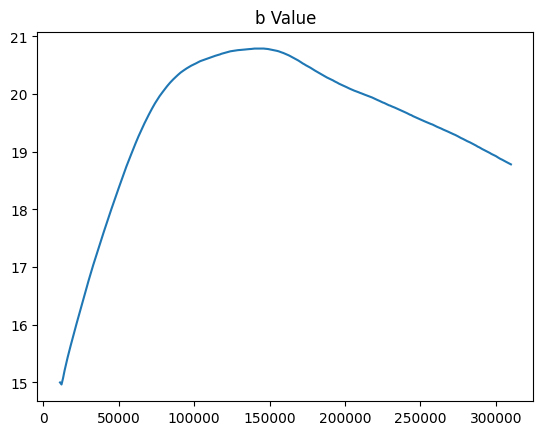

In [25]:
plt.plot(steps, bias_value)
plt.title('b Value')
plt.show()

In [26]:
# Correlation
true_r = file["evaluation/Rewards Mean"]
implicit_r = file["trainer/ZF Policy Reward"].rolling(20).mean()
cor = true_r.corr(implicit_r, method='pearson')
cor

0.6698065214891575

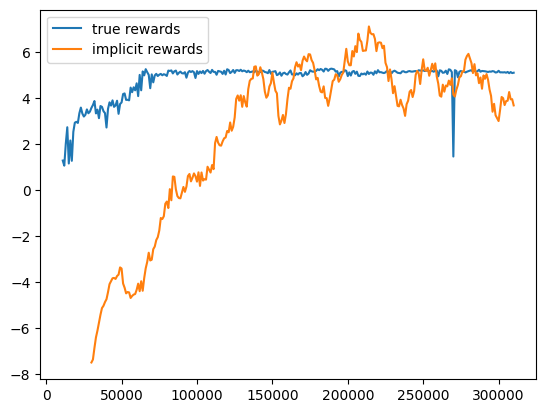

In [27]:
plt.plot(steps, true_r, label='true rewards')
plt.plot(steps, implicit_r, label='implicit rewards')
plt.legend()
plt.show()

In [28]:
# plt.plot(steps, path_l_min)
# plt.title('Policy Loss')
# plt.show()

In [29]:
# ood1_mean = file['trainer/Q1 OOD Mean']
# ood1_std = file['trainer/Q1 OOD Std']

In [ ]:
# plt.plot(steps, ood1_mean, label='mean')
# plt.plot(steps, ood1_std, label='std')
# plt.legend()
# plt.yscale('log')
# plt.title('Delta_Q1 (OOD)')
# plt.show()

In [ ]:
# ood2_mean = file['trainer/Q2 OOD Mean']
# ood2_std = file['trainer/Q2 OOD Std']

In [ ]:
# plt.plot(steps, ood2_mean, label='mean')
# plt.plot(steps, ood2_std, label='std')
# plt.legend()
# plt.yscale('log')
# plt.title('Delta_Q2 (OOD)')
# plt.show()

In [ ]:
# plt.plot(steps, ood1_mean, label='deltaQ1')
# plt.plot(steps, ood2_mean, label='deltaQ2')
# plt.legend()
# # plt.yscale('log')
# plt.title('DeltaQ Mean (OOD)')
# plt.show()

In [ ]:
# plt.plot(steps, ood1_std, label='deltaQ1')
# plt.plot(steps, ood2_std, label='deltaQ2')
# plt.legend()
# # plt.yscale('log')
# plt.title('DeltaQ STD (OOD)')
# plt.show()

In [ ]:
p_grad = file['trainer/Policy Grad Norm']
z1_grad = file['trainer/Zf1 Grad Norm']
z2_grad = file['trainer/Zf2 Grad Norm']

In [ ]:
p_param = file['trainer/Policy Param Norm']
z1_param = file['trainer/Zf1 Param Norm']
z2_param = file['trainer/Zf2 Param Norm']

In [ ]:
plt.plot(steps, p_grad, label='grad norm')
plt.plot(steps, p_param, label='weights norm ')
plt.legend()
plt.title('Policy')
plt.show()

In [ ]:
z_grad = (z1_grad + z2_grad) / 2.
z_param = (z1_param + z2_param) / 2.

In [ ]:
plt.plot(steps, z_grad, label='z grad norm')
plt.plot(steps, z_param, label='z weights norm')
plt.yscale('log')
plt.legend()
plt.title('Z-value Function')
plt.show()

# many runs

## Ex8: Z(s,a), no mean-std, learnable alpha and b

In [ ]:
# Ant 300 7.5e-5
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_14_17_36_32_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_15_09_19_45_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_15_10_52_07_0000--s-2/progress.csv'

In [ ]:
# Walker
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_15_16_37_39_0000--s-0/progress.csv'

## Ex7: Q(s,a), no-mean-std, rectified idsac.py & iqloss.py

In [ ]:
# Walker 300 7.5e-5
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_08_15_18_05_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_08_16_46_36_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_08_18_12_35_0000--s-2/progress.csv'

In [ ]:
# Ant 300 7.5e-5
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_09_09_27_39_0000--s-0/progress.csv'
path_s1 = ''
path_s2 = ''

## Ex6: Z(s,a), mean-std, rectified idsac.py & iqloss.py

In [ ]:
# Walker 360 1e-4
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_14_32_57_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_16_17_40_0000--s-1/progress.csv'
path_s2 = ''

## Ex5: Z(s,a), no mean-std, rectified idsac.py & iqloss.py

In [ ]:
# Walker 360 1e-4
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_00_17_24_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_11_05_46_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_12_48_03_0000--s-2/progress.csv'

In [ ]:
# Walker 360 5e-5
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_23_50_59_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_09_52_53_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_11_36_02_0000--s-2/progress.csv'

In [ ]:
# Walker 300 7.5e-5
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_12_09_18_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_13_59_27_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_15_27_33_0000--s-2/progress.csv'

In [ ]:
# Ant 300 7.5e-5
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_07_17_07_28_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_08_08_39_26_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_08_10_21_35_0000--s-2/progress.csv'

In [ ]:
# Humanoid 400 5e-5
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_06_18_12_07_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_06_20_50_39_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_08_12_08_58_0000--s-2/progress.csv'

## Ex4: Z(s,a), no mean-std, omitted entropy from chi_loss

In [ ]:
# Ant 360
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_30_11_13_12_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_30_17_28_59_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_30_19_14_46_0000--s-2/progress.csv'

In [ ]:
# Humanoid 510
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_31_10_13_58_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_31_12_51_43_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_31_15_23_07_0000--s-2/progress.csv'

In [ ]:
# Walker 360
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_31_18_12_06_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_31_19_49_52_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_01_16_34_09_0000--s-2/progress.csv'

## Ex3: Q(s,a), withou mean-STD

In [ ]:
# Ant 360
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_28_10_07_42_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_28_12_03_37_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_28_14_04_47_0000--s-2/progress.csv'

In [ ]:
# Walker 360
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_04_12_44_29_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_04_14_47_59_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_04_16_32_22_0000--s-2/progress.csv'

## EX2: Runs on IQ venv (gym==0.17) with experts from (gym==0.17)

In [ ]:
# Chettah 360
path_s0 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_05_27_09_12_27_0000--s-0/progress.csv'
path_s1 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_05_27_11_02_13_0000--s-1/progress.csv'
path_s2 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_05_27_12_48_42_0000--s-2/progress.csv'

In [ ]:
# Ant 359
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_23_22_51_35_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_24_09_08_41_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_24_11_11_54_0000--s-2/progress.csv'

In [ ]:
# Walker 360
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_23_17_26_14_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_25_09_29_43_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_25_11_18_46_0000--s-2/progress.csv'

In [ ]:
# Hopper 360
path_s0 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_05_25_13_08_00_0000--s-0/progress.csv'
path_s1 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_05_25_14_58_33_0000--s-1/progress.csv'
path_s2 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_05_25_16_46_08_0000--s-2/progress.csv'

In [ ]:
# Humanoid 470
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_26_12_53_12_0000--s-2/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_26_10_05_13_0000--s-1/progress.csv'
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_20_14_43_39_0000--s-0/progress.csv'

## EX1: Runs on iq venv (gym==0.25.2) with experts from (gym==0.17)

### 1 E-4

In [ ]:
# Ant 534 402 491
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_03_22_04_46_59_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_07_08_08_46_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_08_02_56_10_0000--s-2/progress.csv'

In [ ]:
# HalfCheetah
path_s0 = ''
path_s1 = ''
path_s2 = ''

In [ ]:
# Walker 332 441 393
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_04_04_04_28_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_05_01_05_34_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_09_09_35_19_0000--s-2/progress.csv'

In [ ]:
# Humanoid 530
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_03_23_09_30_23_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_04_03_03_42_01_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_04_13_06_20_12_0000--s-2/progress.csv'

In [ ]:
# Hopper 342 343 350
path_s0 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_03_23_02_14_46_0000--s-0/progress.csv'
path_s1 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_09_07_49_45_0000--s-1/progress.csv'
path_s2 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_14_05_41_35_0000--s-2/progress.csv'

### 7.5 E-5

In [ ]:
# Ant 390 390 390
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_11_07_11_42_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_11_09_11_34_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_11_11_06_44_0000--s-2/progress.csv'

In [ ]:
# HalfCheetah 290 335 290
path_s0 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_04_12_07_50_47_0000--s-0/progress.csv'
path_s1 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_04_12_09_12_45_0000--s-1/progress.csv'
path_s2 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_04_12_10_42_26_0000--s-2/progress.csv'

In [ ]:
# Walker 350, 400, 400
path_s0 = 'data-oldy/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_10_05_26_01_0000--s-0/progress.csv'
path_s1 = 'data-oldy/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_10_09_06_17_0000--s-1/progress.csv'
path_s2 = 'data-oldy/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_10_07_11_08_0000--s-2/progress.csv'

In [ ]:
# Humanoid 530
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_03_23_09_30_23_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_04_03_03_42_01_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_04_13_06_20_12_0000--s-2/progress.csv'

In [ ]:
# Hopper 274 350 350 
path_s0 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_07_05_32_05_0000--s-0/progress.csv'
path_s1 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_14_02_03_04_0000--s-1/progress.csv'
path_s2 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_14_04_00_31_0000--s-2/progress.csv'

# Plot (Mu +/- Std)

In [ ]:
def plot_curves(paths, 
                env_id, 
                max_iter,
                std_coef=0.5,
                rolling=False, 
                window=20):

    tresholds = {
        'Ant': 4500,
        'Walker': 5000,
        'Humanoid': 5000,
        'HalfCheetah': 5000,
        'Hopper': 3500,
    }
    expert_treshold = tresholds[env_id]
    
    path_s0, path_s1, path_s2 = paths
    def df_util(path, returns=True):
        df = pandas.read_csv(path)[:max_iter]
        if returns:
            return df['evaluation/Returns Mean'].to_numpy()
        else:
            return df['replay_buffer/size'].to_numpy()

    r0 = df_util(path_s0)
    r1 = df_util(path_s1)
    r2 = df_util(path_s2)
    steps = df_util(path_s0, returns=False) // 1000
    returns = np.zeros((max_iter, 3))
    returns[:, 0] = r0
    returns[:, 1] = r1
    returns[:, 2] = r2
    r_mean = returns.mean(axis=1)
    r_std = returns.std(axis=1)

    if rolling:
        ma_r_mean = pandas.Series(r_mean).rolling(window).mean().to_numpy()
        ma_r_std = pandas.Series(r_std).rolling(window).mean().to_numpy()
        plt.plot(steps, ma_r_mean, label='iDSAC')
        plt.fill_between(x=steps, 
                         y1=(ma_r_mean - std_coef * ma_r_std), 
                         y2=(ma_r_mean + std_coef * ma_r_std), 
                         alpha=0.2)
        plt.title(f"{env_id}-v2  (mu+/-{std_coef} std, rolling={window})")
        # plt.xlim(5 + window, 10 + max_iter)
    else:
        plt.plot(steps, r_mean, label='iDSAC')
        plt.fill_between(x=steps, 
                         y1=(r_mean - std_coef * r_std), 
                         y2=(r_mean + std_coef * r_std), 
                         alpha=0.2)
        plt.title(f"{env_id}-v2  (mu+/-{std_coef} std)")
        # plt.xlim(5, 10 + max_iter)
        
    plt.axhline(y=expert_treshold, c='r', ls='--', lw=1, alpha=0.8, label='expert')
    plt.legend(loc='lower right')
    plt.xlabel("Steps (1k)")
    plt.ylabel("Episode Rewards")
    plt.tight_layout()
    plt.show()

In [ ]:
paths = (path_s0, path_s1, path_s2)
plot_curves(paths, 'Walker', 350, std_coef=0.5, rolling=False)
plot_curves(paths, 'Walker', 350, std_coef=0.5, rolling=True, window=10)

# Plot Lines

In [ ]:
def plot_lines(paths, 
                env_id, 
                max_iter,
                std_coef=0.5,
                rolling=False, 
                window=20):

    tresholds = {
        'Ant': 4500,
        'Walker': 5000,
        'Humanoid': 5000,
        'HalfCheetah': 5000,
        'Hopper': 3500,
    }
    expert_treshold = tresholds[env_id]
    
    path_s0, path_s1, path_s2 = paths
    def df_util(path, returns=True):
        df = pandas.read_csv(path)[:max_iter]
        if returns:
            return df['evaluation/Returns Mean']
        else:
            return df['replay_buffer/size']

    r0 = df_util(path_s0)
    r1 = df_util(path_s1)
    r2 = df_util(path_s2)
    steps = df_util(path_s0, returns=False) // 1000
    
    colors = ['b', 'r', 'g']
    
    if rolling:
        for i, r in enumerate([r0, r1, r2]):
            r = r.rolling(window).mean()
            plt.plot(steps, r, color=colors[i])
        plt.axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
        plt.title(f"{env_id}-v2 , rolling={window})")
    else:
        for i, r in enumerate([r0, r1, r2]):
            plt.plot(steps, r, color=colors[i])
        plt.axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
        plt.title(f"{env_id}-v2")
        
    plt.show()
    plt.close()

In [ ]:
paths = (path_s0, path_s1, path_s2)
plot_lines(paths, 'Walker', 350, std_coef=0.5, rolling=False)
plot_lines(paths, 'Walker', 350, std_coef=0.5, rolling=True, window=10)

# extra

## not important

In [ ]:
def plot_lines(paths, 
                env_id, 
                expert_treshold, 
                max_iter,
                std_coef=0.5,
                rolling=False, 
                window=20):
    
    path_s0, path_s1, path_s2 = paths
    def df_util(path, returns=True):
        df = pandas.read_csv(path)[:max_iter]
        if returns:
            return df['evaluation/Returns Mean']
        else:
            return df['replay_buffer/size']

    r0 = df_util(path_s0)
    r1 = df_util(path_s1)
    r2 = df_util(path_s2)
    steps = df_util(path_s0, returns=False) // 1000
    
    colors = ['b', 'r', 'g']
    fig, axs = plt.subplots(1, 3)
    
    if rolling:
        for i, r in enumerate([r0, r1, r2]):
            r = r.rolling(window).mean()
            axs[i].plot(steps, r, color=colors[i])
            axs[i].axhline(y=expert_treshold, c='b', ls='--', lw=1, alpha=0.8)
            axs[i].set_title(f'seed={i}')
        fig.suptitle(f"{env_id}-v2  (mu+/-{std_coef} std, rolling={window})")
    else:
        for i, r in enumerate([r0, r1, r2]):
            r = r.rolling(window).mean()
            axs[i].plot(steps, r, color=colors[i])
            axs[i].set_title(f'seed={i}')
        fig.suptitle(f"{env_id}-v2  (mu+/-{std_coef} std)")
        
    plt.show()

In [ ]:
paths = (path_s0, path_s1, path_s2)
plot_lines(paths, 'Walker', 5000, 300, std_coef=0.5, rolling=False, window=10)
plot_lines(paths, 'Walker', 5000, 300, std_coef=0.5, rolling=True, window=10)

## rolling mean

In [ ]:
def create_df(path_s0, path_s1, path_s2, max_iter):
    s0 = pandas.read_csv(path_s0)[:max_iter]
    s1 = pandas.read_csv(path_s1)[:max_iter]
    s2 = pandas.read_csv(path_s2)[:max_iter]
    r0 = s0['evaluation/Returns Mean']
    r1 = s1['evaluation/Returns Mean']
    r2 = s2['evaluation/Returns Mean']
    steps = s0['replay_buffer/size']
    
    def util(data, seed, steps, window=3):
        df = pandas.DataFrame(data)
        df.columns = ['Returns']
        df['Moving Returns'] = df['Returns'].rolling(window=window).mean()
        df.bfill(inplace=True)
        df['Seed'] = seed
        df.index = steps
        df.index.name = 'Steps'
        return df
        
    r0 = util(r0, 0, steps)
    r1 = util(r1, 1, steps)
    r2 = util(r2, 2, steps)
    df = pandas.concat([r0, r1, r2], ignore_index=False)
    return df
    
df = create_df(path_s0, path_s1, path_s2, max_iter=400)
df = df.drop(['Returns'], axis=1)

In [ ]:
def plotty_ma(df, env_name, error_name, treshold):
    error_val = 95 if error_name == 'ci' else 0.5
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x='Steps', y='Moving Returns', errorbar=(error_name, error_val), label='ours', ax=ax)
    ax.axhline(treshold, ls='--', c='red', label='expert')
    ax.ticklabel_format(style='scientific', scilimits=(3,3), axis='both', useMathText=True)
    ax.legend(loc='lower right')
    plt.title(f'{env_name} ({error_name} {error_val} | window=5)')
    ax.set_xlabel('Steps')
    ax.set_ylabel('Returns')
    # plt.savefig()
    plt.show()

In [ ]:
plotty_ma(df, 'Humanoid', 'ci', 5000)
plotty_ma(df, 'Humanoid', 'sd', 5000)

## mean

In [ ]:
def create_df(path_s0, path_s1, path_s2, max_iter):
    s0 = pandas.read_csv(path_s0)[:max_iter]
    s1 = pandas.read_csv(path_s1)[:max_iter]
    s2 = pandas.read_csv(path_s2)[:max_iter]
    r0 = s0['evaluation/Returns Mean']
    r1 = s1['evaluation/Returns Mean']
    r2 = s2['evaluation/Returns Mean']
    steps = s0['replay_buffer/size']
    
    def util(data, seed, steps):
        df = pandas.DataFrame(data)
        df.columns = ['Returns']
        df['Seed'] = seed
        df.index = steps
        df.index.name = 'Steps'
        return df
        
    r0 = util(r0, 0, steps)
    r1 = util(r1, 1, steps)
    r2 = util(r2, 2, steps)
    df = pandas.concat([r0, r1, r2], ignore_index=False)
    return df
    
df = create_df(path_s0, path_s1, path_s2, max_iter=400)

In [ ]:
def plotty(df, env_name, error_name, treshold):
    error_val = 95 if error_name == 'ci' else 0.5
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x='Steps', y='Returns', errorbar=(error_name, error_val), label='ours', ax=ax)
    ax.axhline(treshold, ls='--', c='red', label='expert')
    ax.ticklabel_format(style='scientific', scilimits=(3,3), axis='both', useMathText=True)
    ax.legend(loc='lower right')
    plt.title(f'{env_name} ({error_name} {error_val})')
    ax.set_xlabel('Steps')
    ax.set_ylabel('Returns')
    # plt.savefig()
    plt.show()

In [ ]:
plotty(df, 'Humanoid', 'ci', 5000)
plotty(df, 'Humanoid', 'sd', 5000)